# Iris Flower Classification

* Sandikha Rahardi (Kuldii Project)
* https://kuldiiproject.com

This notebook demonstrates a professional workflow for classifying the Iris dataset using multiple machine learning models (Logistic Regression, SVM, Random Forest, KNN) with hyperparameter tuning via GridSearchCV. An interactive Gradio app is also provided for real-time predictions.

## 1. Import Libraries
Import essential libraries for data analysis, visualization, machine learning, and interactive user interface development.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set_theme(style='whitegrid')

import os
import joblib

import numpy as np  
import gradio as gr
import pandas as pd  
from matplotlib import cm
import matplotlib.pyplot as plt  

from sklearn.svm import SVC  
from sklearn import datasets  
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  

## 2. Load and Prepare the Data
Load the Iris dataset, convert it to a DataFrame, and perform train-test splitting and feature scaling.

In [2]:
# Load Iris dataset dan konversi ke DataFrame
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Split fitur dan target
y = df['target']
X = df[iris.feature_names]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3. Data Exploration and Visualization
Let's take a look at the data, its structure, and visualize some relationships.

### Exploratory Data Analysis (EDA)

In this section, we will perform a comprehensive EDA, including:
- Summary statistics
- Distribution plots for each feature
- Correlation heatmap
- Pairwise relationships
- Class balance visualization

All visualizations will use modern, attractive styles.

In [3]:
display(df.describe().T)

# Check for missing values
missing = df.isnull().sum()
print('Missing values per column:')
print(missing)

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


Missing values per column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


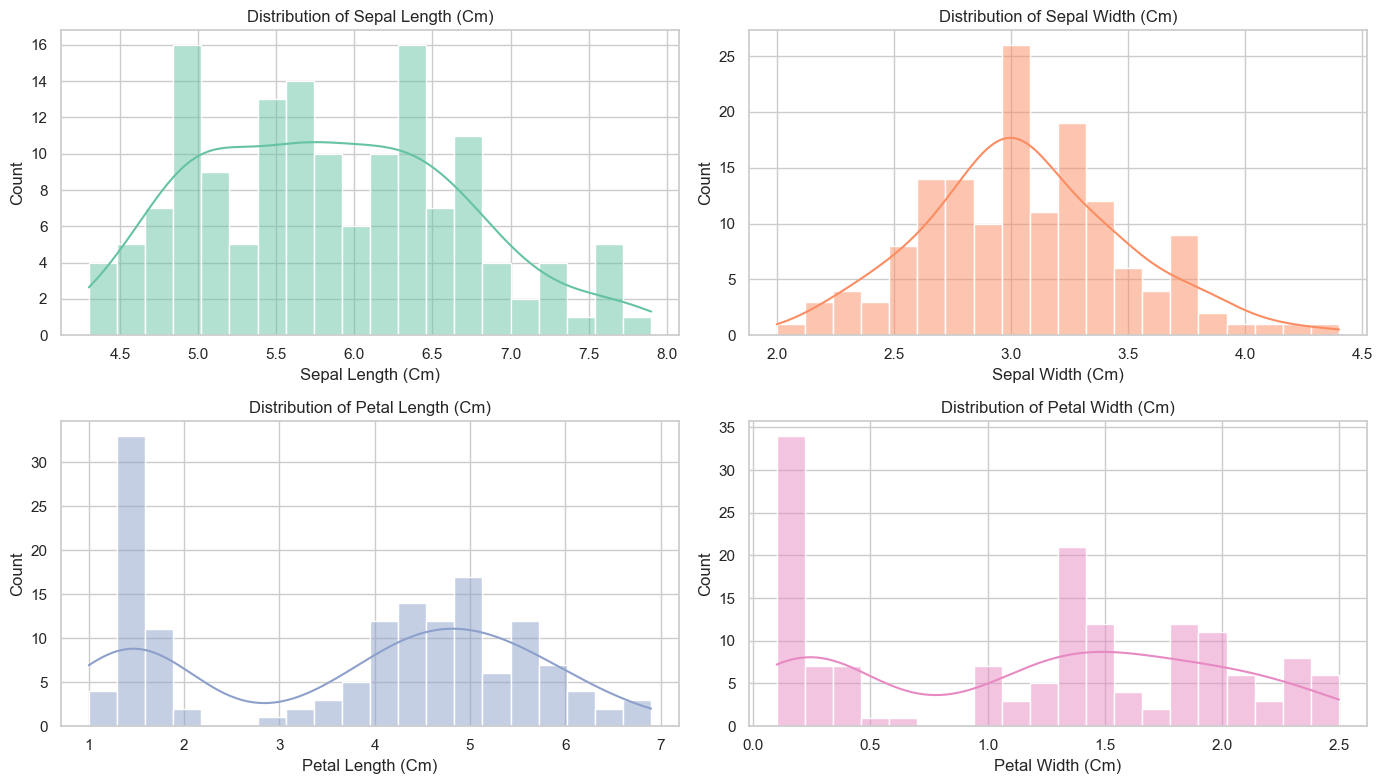

In [4]:
plt.figure(figsize=(14, 8))
palette = sns.color_palette("Set2", len(iris.feature_names))
for i, col in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True, color=palette[i], bins=20)
    plt.title(f'Distribution of {col.title()}')
    plt.xlabel(col.title())
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

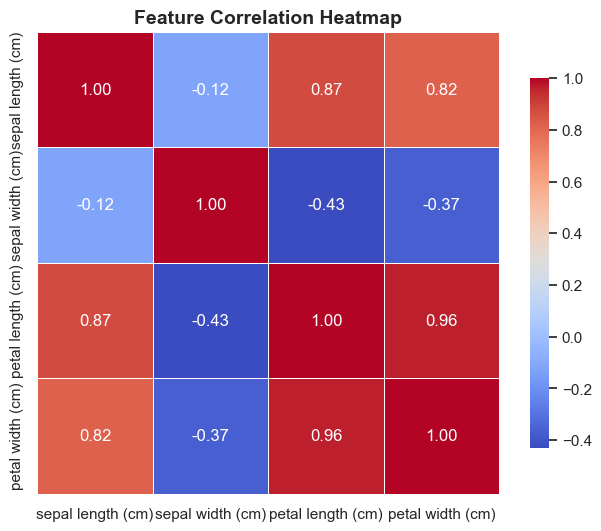

In [5]:
plt.figure(figsize=(8, 6))
corr = df[iris.feature_names].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.show()

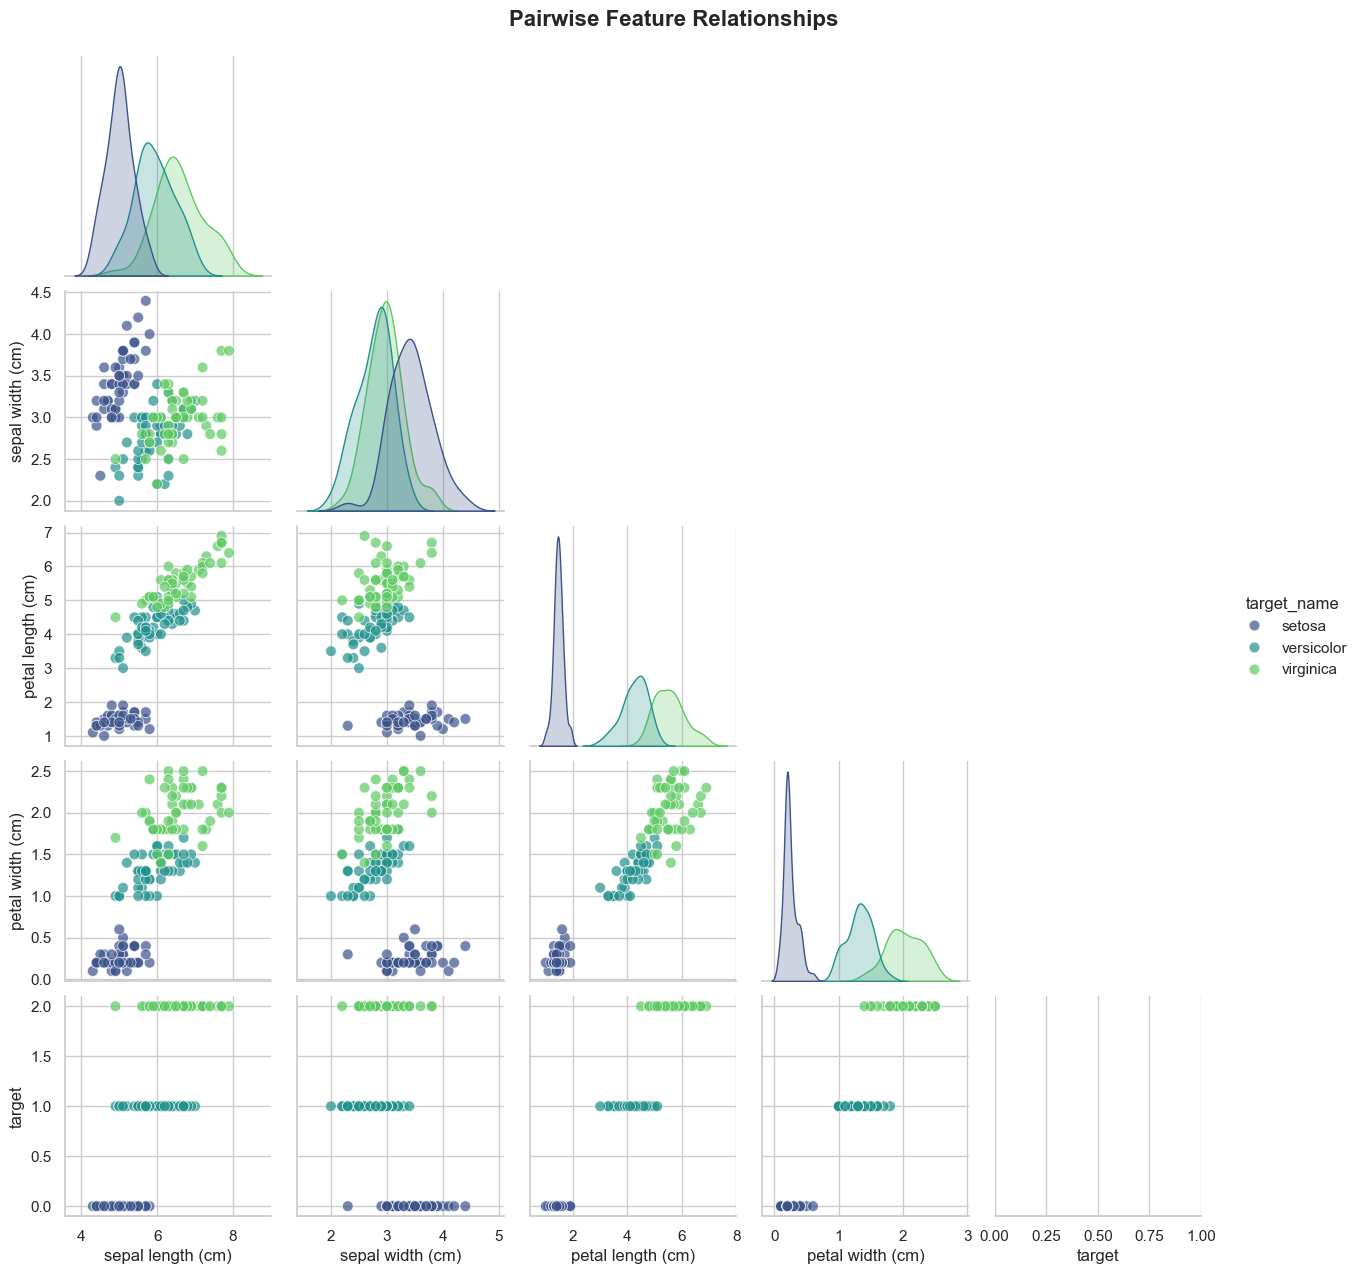

In [6]:
# Add species name column if not already present
if 'target_name' not in df.columns:
	df['target_name'] = df['target'].map(dict(enumerate(iris.target_names)))

sns.pairplot(df, hue='target_name', palette='viridis', diag_kind='kde', corner=True, plot_kws={'alpha':0.7, 's':60})
plt.suptitle('Pairwise Feature Relationships', y=1.02, fontsize=16, fontweight='bold')
plt.show()

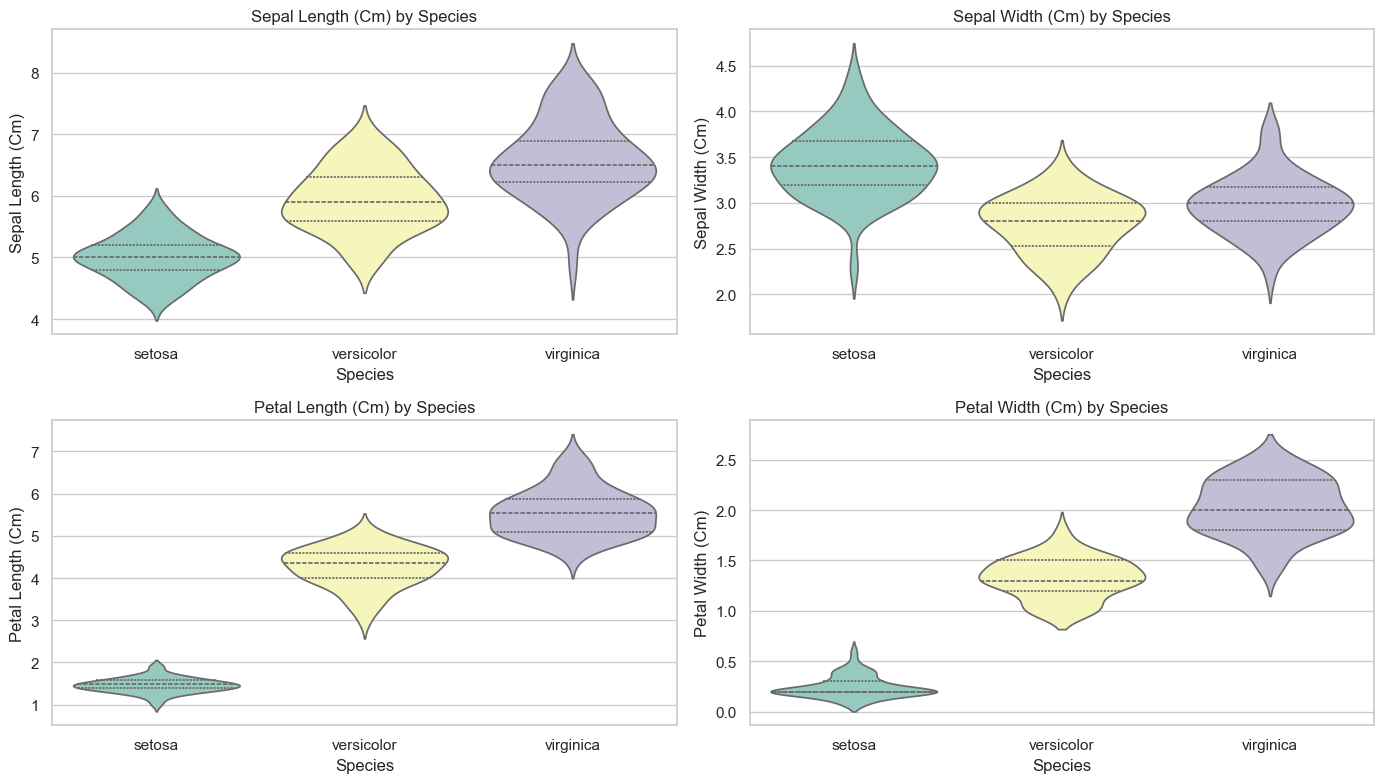

In [7]:
plt.figure(figsize=(14, 8))
for i, col in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='target_name', y=col, data=df, palette='Set3', inner='quartile')
    plt.title(f'{col.title()} by Species')
    plt.xlabel('Species')
    plt.ylabel(col.title())
plt.tight_layout()
plt.show()

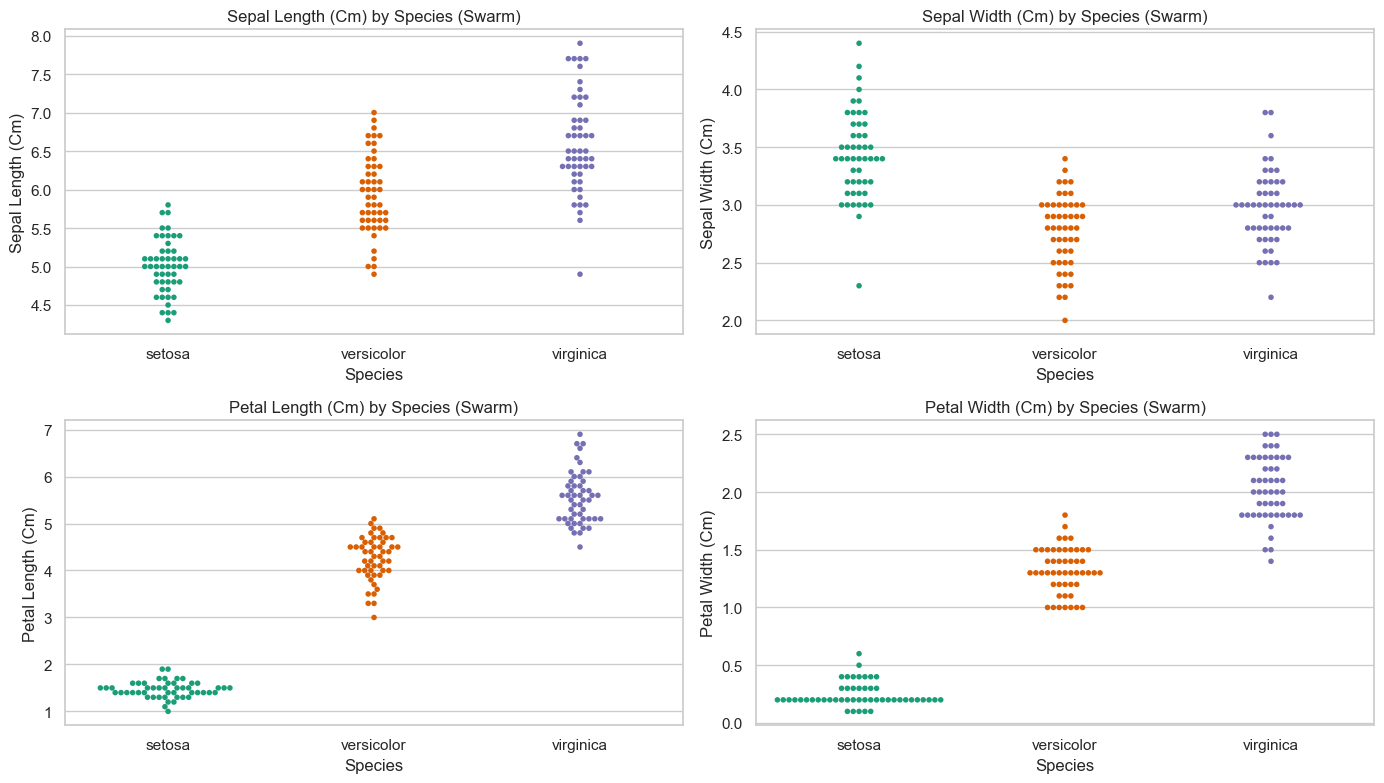

In [8]:
plt.figure(figsize=(14, 8))
for i, col in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.swarmplot(x='target_name', y=col, data=df, palette='Dark2', size=4)
    plt.title(f'{col.title()} by Species (Swarm)')
    plt.xlabel('Species')
    plt.ylabel(col.title())
plt.tight_layout()
plt.show()

In [9]:
# Tampilkan 5 baris pertama, info, dan shape
display(df.head())
df.info()
print(f"Shape: {df.shape}")

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   target_name        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
Shape: (150, 6)


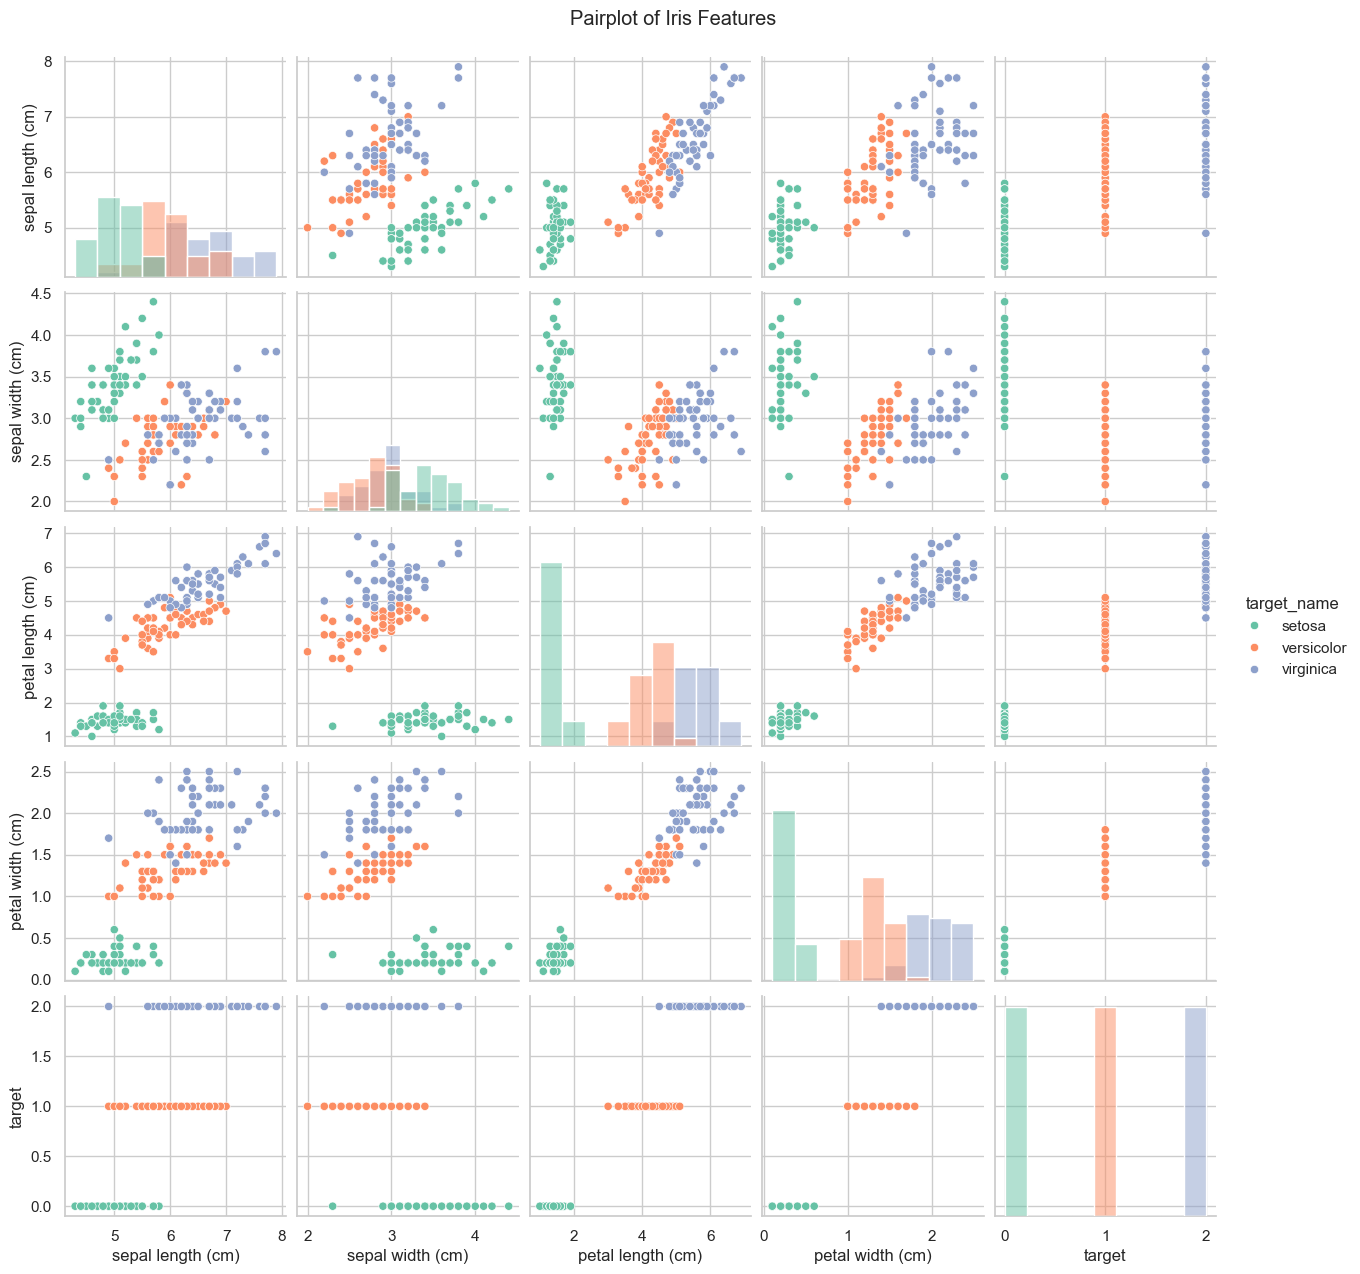

In [10]:
# Pairplot fitur Iris
sns.pairplot(df, hue='target_name', palette='Set2', diag_kind='hist')
plt.suptitle('Pairplot of Iris Features', y=1.02)
plt.show()

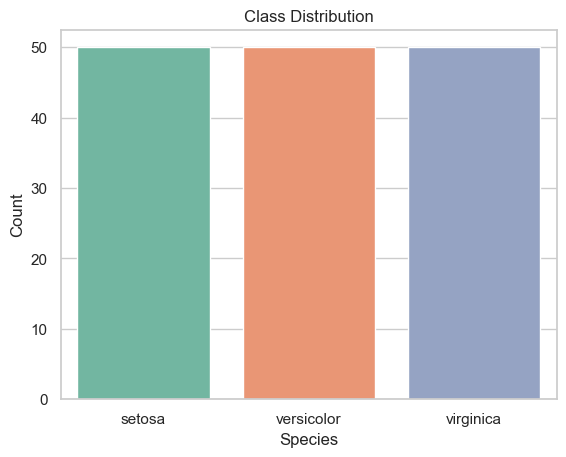

In [11]:
# Distribusi kelas target
sns.countplot(x='target', data=df, palette='Set2')
plt.title('Class Distribution')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=iris.target_names)
plt.show()

## 4. Training and Hyperparameter Tuning of Multiple Models with GridSearchCV

We will train and tune several classifiers (Logistic Regression, SVM, Random Forest, KNN) using GridSearchCV. The best models will be stored for later use in the Gradio application.

In [12]:
# Define models and their parameter grids
models = {
    'Logistic Regression': (LogisticRegression(max_iter=200, random_state=42), {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    }),
    'SVM': (SVC(probability=True, random_state=42), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }),
    'Random Forest': (RandomForestClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10]
    }),
    'KNN': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    })
}

best_models = {}
results = []
reports = {}
matrices = []

for name, (model, params) in models.items():
    print(f"\nTraining and tuning {name}...")
    grid = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid.fit(X_train_scaled, y_train)
    best_models[name] = grid.best_estimator_
    y_pred = grid.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results.append({'Model': name, 'Best Params': grid.best_params_, 'Test Accuracy': acc})
    reports[name] = classification_report(y_test, y_pred, target_names=iris.target_names, output_dict=True)
    matrices.append(confusion_matrix(y_test, y_pred))
    print(f"Best Params: {grid.best_params_}")
    print(f"Test Accuracy: {acc:.2f}")


Training and tuning Logistic Regression...
Best Params: {'C': 10, 'solver': 'lbfgs'}
Test Accuracy: 1.00

Training and tuning SVM...
Best Params: {'C': 0.1, 'kernel': 'linear'}
Test Accuracy: 0.93

Training and tuning Random Forest...
Best Params: {'C': 0.1, 'kernel': 'linear'}
Test Accuracy: 0.93

Training and tuning Random Forest...
Best Params: {'max_depth': None, 'n_estimators': 50}
Test Accuracy: 0.90

Training and tuning KNN...
Best Params: {'n_neighbors': 5, 'weights': 'uniform'}
Test Accuracy: 0.93
Best Params: {'max_depth': None, 'n_estimators': 50}
Test Accuracy: 0.90

Training and tuning KNN...
Best Params: {'n_neighbors': 5, 'weights': 'uniform'}
Test Accuracy: 0.93


In [13]:
results_df = pd.DataFrame(results)
results_df

,Model,Best Params,Test Accuracy
0,Logistic Regression,"{'C': 10, 'solver': 'lbfgs'}",1.000000
1,SVM,"{'C': 0.1, 'kernel': 'linear'}",0.933333
2,Random Forest,"{'max_depth': None, 'n_estimators': 50}",0.900000
3,KNN,"{'n_neighbors': 5, 'weights': 'uniform'}",0.933333



Logistic Regression Classification Report:


,precision,recall,f1-score,support
setosa,1.0,1.0,1.0,10.0
versicolor,1.0,1.0,1.0,10.0
virginica,1.0,1.0,1.0,10.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,30.0
weighted avg,1.0,1.0,1.0,30.0


Confusion Matrix:


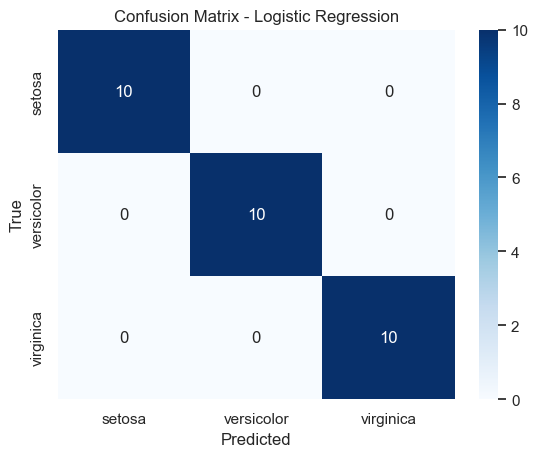


SVM Classification Report:


,precision,recall,f1-score,support
setosa,1.000000,1.000000,1.000000,10.000000
versicolor,0.900000,0.900000,0.900000,10.000000
virginica,0.900000,0.900000,0.900000,10.000000
accuracy,0.933333,0.933333,0.933333,0.933333
macro avg,0.933333,0.933333,0.933333,30.000000
weighted avg,0.933333,0.933333,0.933333,30.000000


Confusion Matrix:


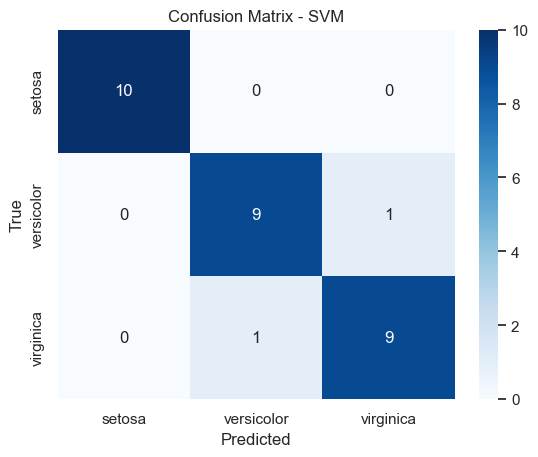


Random Forest Classification Report:


,precision,recall,f1-score,support
setosa,1.000000,1.0,1.000000,10.0
versicolor,0.818182,0.9,0.857143,10.0
virginica,0.888889,0.8,0.842105,10.0
accuracy,0.900000,0.9,0.900000,0.9
macro avg,0.902357,0.9,0.899749,30.0
weighted avg,0.902357,0.9,0.899749,30.0


Confusion Matrix:


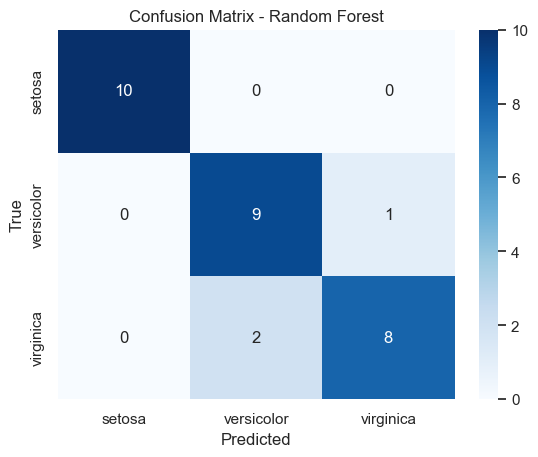


KNN Classification Report:


,precision,recall,f1-score,support
setosa,1.000000,1.000000,1.000000,10.000000
versicolor,0.833333,1.000000,0.909091,10.000000
virginica,1.000000,0.800000,0.888889,10.000000
accuracy,0.933333,0.933333,0.933333,0.933333
macro avg,0.944444,0.933333,0.932660,30.000000
weighted avg,0.944444,0.933333,0.932660,30.000000


Confusion Matrix:


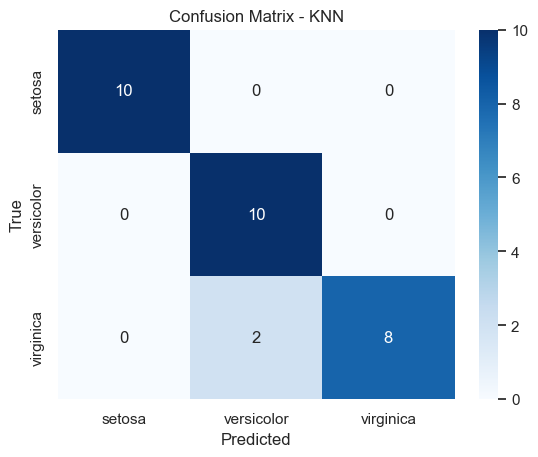

In [14]:
# Tampilkan classification report dan confusion matrix untuk semua model
def show_reports_and_matrices():
    for name, matrix in zip(best_models, matrices):
        print(f"\n{name} Classification Report:")
        display(pd.DataFrame(reports[name]).T)
        print(f"Confusion Matrix:")
        sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

show_reports_and_matrices()

## 5. Interactive Gradio Application

An interactive Gradio interface is provided below to allow users to select a trained model and input feature values for real-time Iris species prediction.

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


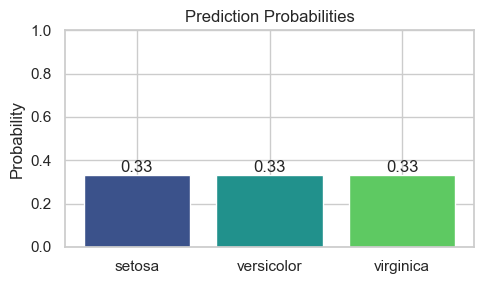

In [15]:
species_names = iris.target_names.tolist()
feature_names = iris.feature_names

# --- FUNCTIONS ---

# Plot default probability (e.g. all equal probabilities)
def default_proba_plot():
    fig, ax = plt.subplots(figsize=(5, 3))
    proba = [1/len(species_names)] * len(species_names)
    bars = ax.bar(species_names, proba, color=sns.color_palette("viridis", len(species_names)))
    ax.set_ylim(0, 1)
    ax.set_ylabel("Probability")
    ax.set_title("Prediction Probabilities")
    for bar, p in zip(bars, proba):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{p:.2f}",
                ha='center', va='bottom', fontsize=12)
    plt.tight_layout()
    return fig

def predict_species(model_name, sepal_length, sepal_width, petal_length, petal_width):
    input_features = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    input_scaled = scaler.transform(input_features)
    model = best_models[model_name]
    pred = model.predict(input_scaled)[0]

    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(input_scaled)[0]
    else:
        proba = np.zeros(len(species_names))
        proba[pred] = 1.0

    predicted_species = species_names[pred]
    result_text = f"🌸 **Predicted Species:** {predicted_species.capitalize()}"
    
    fig, ax = plt.subplots(figsize=(5, 3))
    bars = ax.bar(species_names, proba, color=sns.color_palette("viridis", len(species_names)))
    ax.set_ylim(0, 1)
    ax.set_ylabel("Probability")
    ax.set_title("Prediction Probabilities")
    for bar, p in zip(bars, proba):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{p:.2f}",
                ha='center', va='bottom', fontsize=12)
    plt.tight_layout()
    
    return result_text, fig

# Create default chart
default_chart = default_proba_plot()

# --- GRADIO APP ---

with gr.Blocks() as demo:
    gr.Markdown("""
    # 🌺 Iris Flower Species Prediction
    Built with Scikit-learn, Matplotlib, Seaborn & Gradio — by Kuldii Project
    
    
    Welcome to the **Iris Flower Classifier App**!  
    🌿 This app uses machine learning to predict the species of an iris flower based on four measurements:

    - Sepal Length
    - Sepal Width
    - Petal Length
    - Petal Width

    **How to use:**
    1. Choose a machine learning model.
    2. Adjust the sliders to input flower measurements.
    3. Click **Predict**.

    The app will display:
    - The predicted iris species.
    - A probability chart for all classes.

    *Happy exploring!* 😊
    """)

    model_dropdown = gr.Dropdown(
        choices=list(best_models.keys()), 
        value=list(best_models.keys())[0], 
        label="Select Model"
    )
    
    sepal_length = gr.Slider(minimum=4.0, maximum=8.0, value=5.1, step=0.1, label=feature_names[0])
    sepal_width = gr.Slider(minimum=2.0, maximum=4.5, value=3.5, step=0.1, label=feature_names[1])
    petal_length = gr.Slider(minimum=1.0, maximum=7.0, value=1.4, step=0.1, label=feature_names[2])
    petal_width = gr.Slider(minimum=0.1, maximum=2.5, value=0.2, step=0.1, label=feature_names[3])
    
    with gr.Row():
        output_text = gr.Markdown(value="🌸 **Predicted Species:** -", label="Prediction Result")
        chart = gr.Plot(value=default_chart, label="Probability Chart")

    btn = gr.Button("🌼 Predict")
    btn.click(
        fn=predict_species,
        inputs=[model_dropdown, sepal_length, sepal_width, petal_length, petal_width],
        outputs=[output_text, chart]
    )

demo.launch()

In [16]:
os.makedirs('models', exist_ok=True)

# Save all models and scaler in a single dictionary
export_dict = {
    'scaler': scaler,
    'models': best_models
}
joblib.dump(export_dict, 'models/iris_all_models.pkl')
print('Saved: models/iris_all_models.pkl')

Saved: models/iris_all_models.pkl
